## Control Variate Sampling 


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def f(x):
    value = 1 /(1+x)
    return value

In [14]:
def g(x):
    value = 1 + x
    return value

In [15]:
truth = 3.0 / 2.0

In [16]:
truth

1.5

### The Naive Solution

In [17]:
n = 1500
u = np.random.uniform(size=n)
x1 = f(u)
x1.mean()
x1.var()
x1.std()
se = x1.std() / np.sqrt(n)
#standard error = stdev of all observations / sqrt of the sample size

In [8]:
x1.mean()

0.6981109180245715

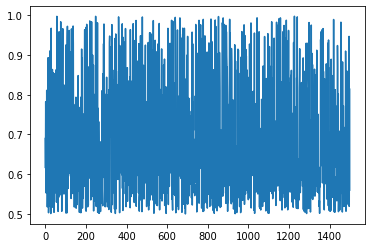

In [20]:
plt.plot(x1)

### The Control Variate Solution

In [21]:
c = 0.4773
y = g(u)
x2 = f(u) + c * (g(u) - truth)

In [22]:
x2.mean()

0.6931003198129017

In [23]:
se2 = x2.std() / np.sqrt(n)

In [24]:
se2

0.0006499450123754368

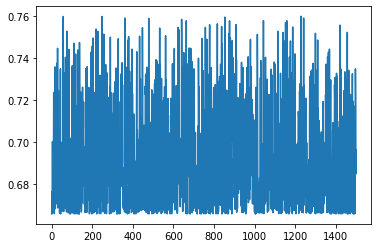

In [27]:
plt.plot(x2)

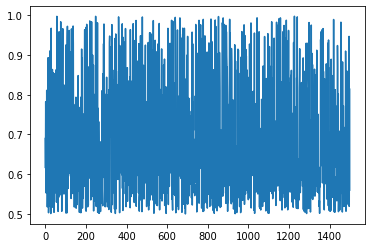

In [28]:
plt.plot(x1)

## Naive Monte Carlo in a BS World

In [29]:
import time
t1 = time.time()

In [30]:
def VanillaCallPayoff(spot, strike):
    return np.maximum(spot - strike, 0.0)

In [31]:
# The same old same old parameters

S = 41.0
K = 40.0
r = 0.08
v = 0.30
q = 0.0
T = 1.0
M = 10000 # number of MC replications
N = 252   # number of MC steps in a particular path

In [32]:
dt = T
nudt = (r - q - 0.5 * v * v) * dt
sigdt = v * np.sqrt(dt)

In [33]:
spot_t = np.empty((N))
call_t = np.empty(M)

z = np.random.normal(size=(M,N))

for i in range(M):
    spot_t[0] = S
    for j in range(1,N):
        spot_t[j] = spot_t[j-1] * np.exp(nudt + sigdt * z[i,j])
    call_t[i] = VanillaCallPayoff(spot_t[-1], K)

In [34]:
call_prc = np.exp(-r * T) * call_t.mean() #call_t is 
t2 = time.time()

In [35]:
call_t.mean()

7910468915.709195

In [36]:
se = call_t.std() / np.sqrt(M)

In [37]:
se

4336250313.049871

In [38]:
print("The Naive Monte Carlo Price is: {0:.3f}".format(call_prc))
print("The Naive Monte Carlo StdErr is: {0:.6f}".format(se))
print("The total time take: {0}".format(t2-t1))

The Naive Monte Carlo Price is: 7302283163.675
The Naive Monte Carlo StdErr is: 4336250313.049871
The total time take: 9.28547215461731


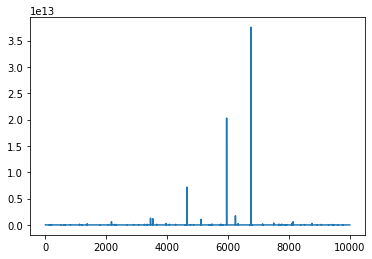

In [45]:
plt.plot(call_t);

### The Control Variate Approach in a BS World

We will use the BS-Delta formula for our control variate. We can write the BS Delta function as follows:

In [46]:
from scipy.stats import norm

In [47]:
def BlackScholesDelta(spot, t, strike, expiry, volatility, rate, dividend):
    tau = expiry - t
    d1 = (np.log(spot/strike) + (rate - dividend + 0.5 * volatility * volatility) * tau) / (volatility * np.sqrt(tau))
    delta = np.exp(-dividend * tau) * norm.cdf(d1) 
    return delta

In [48]:
erddt = np.exp((r - q) * dt)    
beta = -1.0

spot_t = np.empty((N))
call_t = np.empty(M)
#cash_flow_t = np.zeros((engine.replications, ))
z = np.random.normal(size=(M,N))

for i in range(M):
        #spot_t = spot
        convar = 0.0
        #z = np.random.normal(size=int(engine.time_steps))
        spot_t[0] = S
        
        for j in range(1,N):
            t = j * dt
            delta = BlackScholesDelta(S, t, K, T, v, r, q)
            spot_t[j] = spot_t[j-1] * np.exp(nudt + sigdt * z[i,j])
            convar += delta * (spot_t[j] -  spot_t[j-1]* erddt)
            #spot_t = spot_tn

        call_t[i] = VanillaCallPayoff(spot_t[-1], K) + beta * convar

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
disc = np.exp(-r * T)
call_prc = disc * call_t.mean()

In [42]:
nudt

0.035

In [43]:
spot_t = np.empty((N))
call_t = np.empty(M)

z = np.random.normal(size=(M,N))

for i in range(M):
    spot_t[0] = S
    for j in range(1,N):
        spot_t[j] = S * np.exp(nudt + sigdt * z[i,j])
    call_t[i] = VanillaCallPayoff(spot_t[-1], K)

In [44]:
call_t.mean()

7.574918158543756